In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
inspector =  inspect(engine)
# reflect the tables
inspector.get_table_names()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base = automap_base()

In [7]:
Base.prepare(engine, reflect = True)

In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x21522774e50>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [12]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2152274d340>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
date_list = []
recent_date = session.query(Measurement)
for date in recent_date:
    date_list.append(date.date)
most_recent_date = max(date_list)
print(f"The most recent date in the data set is {most_recent_date}")

The most recent date in the data set is 2017-08-23


In [14]:
# Another way to find the most recent date in the data set.
closest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
closest_date= list(closest_date)
closest_date= closest_date[0]
closest_date = dt.datetime.strptime(closest_date, '%Y-%m-%d')
print(f"The most recent date in the data set is {closest_date}")

The most recent date in the data set is 2017-08-23 00:00:00


In [35]:
closest_date

datetime.datetime(2017, 8, 23, 0, 0)

In [15]:
# Lenght of the Measurement Data Set
general_measure = engine.execute("Select * From Measurement").fetchall()
len(general_measure)

19550

In [16]:
# Calculate the date one year from the last date in data set.
year_ago = closest_date - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Perform a query to retrieve the data and precipitation scores
recent_precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= closest_date).\
    filter(Measurement.date >= year_ago).order_by(Measurement.date).all()
recent_precipitation_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df = pd.DataFrame(recent_precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df = precipitation_df.dropna(how="any")
precipitation_df = precipitation_df.set_index("Date")
precipitation_df

Precipitation
Date                     
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           1.22
2016-08-24           2.15
...                   ...
2017-08-22           0.50
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2015 rows x 1 columns]

In [19]:
gpby_precipitation = pd.DataFrame(recent_precipitation_data, columns=['Date', 'Precipitation'])
gpby_precipitation = precipitation_df.dropna(how="any")
gpby_precipitation = precipitation_df.groupby('Date').mean()


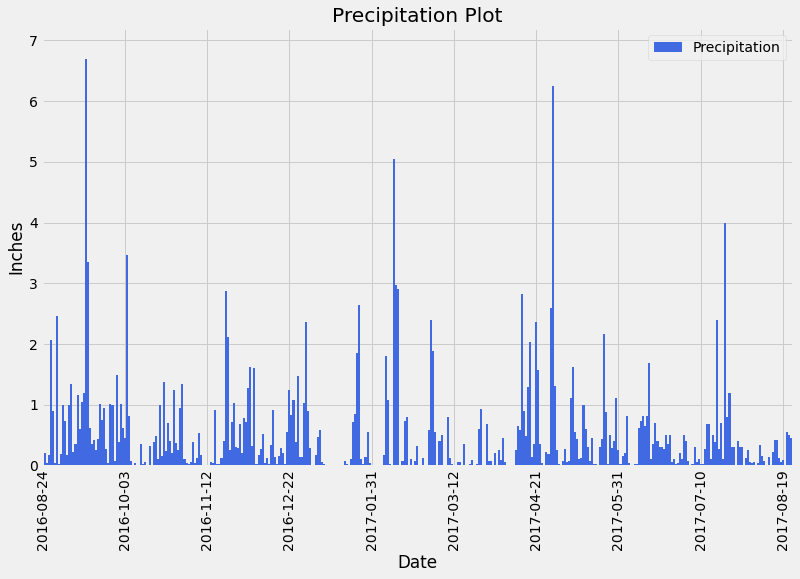

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(12,7.5))

plt.title("Precipitation Plot")
plt.xlabel("Date")
plt.ylabel("Inches")

plt.xlim(-0.5,len(gpby_precipitation["Precipitation"]))
plt.ylim(0, max(precipitation_df["Precipitation"]+0.5))
plt.bar(list(precipitation_df.index.values), precipitation_df["Precipitation"], color='royalblue',
        align ="center",width=1, label='Precipitation')

plt.xticks(np.arange(0, len(gpby_precipitation["Precipitation"])+1, 40),rotation=90)
plt.legend(loc='best')
plt.savefig("Exploratory_Precipitation_Analysis/Precipitation_Plot.png")
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
general_stations= engine.execute("Select * From Station").fetchall()
print(f"There is a total of {len(general_stations)} Stations in the dataset")

There is a total of 9 Stations in the dataset


In [23]:
# Another way design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.name).all()
print(f"There is a total of {len(total_stations)} Stations in the dataset")

There is a total of 9 Stations in the dataset


In [24]:
# Stations Database Design
first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x215253f89d0>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
number_of_stations = engine.execute("Select date, station From Measurement").fetchall()


In [26]:
station_df = pd.DataFrame(number_of_stations, columns=['Date', 'Stations'])
stations_count = station_df.groupby('Stations').count()
stations_count = stations_count.rename(columns = {"Date":"Count"})
stations_count  = stations_count.sort_values(by='Count', ascending = False)
stations_count

Count
Stations          
USC00519281   2772
USC00519397   2724
USC00513117   2709
USC00519523   2669
USC00516128   2612
USC00514830   2202
USC00511918   1979
USC00517948   1372
USC00518838    511

In [27]:
#Most Active Station
mas = station_df['Stations'].mode()
mas = mas.to_list()
mas =  mas[0]
mas

'USC00519281'

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(Measurement.date, Measurement.station,Measurement.tobs).filter(Measurement.station == mas).all()

In [29]:
tobs_df = pd.DataFrame(temperature, columns=['Date', 'Station', 'Temperature'])
lowest_temp = tobs_df['Temperature'].min()
highest_temp = tobs_df['Temperature'].max()
average_temp =tobs_df['Temperature'].mean()
print(f"The lowest temperature registered in station {mas} is {lowest_temp} F°")
print(f"The highest temperature registered in station {mas} is {highest_temp} F°")
print(f"The average temperature registered in station {mas} is {round(average_temp,2)} F°")

The lowest temperature registered in station USC00519281 is 54.0 F°
The highest temperature registered in station USC00519281 is 85.0 F°
The average temperature registered in station USC00519281 is 71.66 F°


In [30]:
filtered_temperature = engine.execute("Select date, station, tobs From Measurement Where station = 'USC00519281' ORDER BY date DESC").fetchall()

In [31]:
filter_tobs_df = pd.DataFrame(filtered_temperature , columns=['Date', 'Station', 'Temperature'])

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist_temperature = engine.execute("Select date, station, tobs From Measurement Where station = 'USC00519281' AND date Between '2016-08-23' AND '2017-08-23' ORDER BY date DESC ").fetchall()

In [33]:
hist_temperature_df = pd.DataFrame(hist_temperature, columns=['Date', 'Station', 'Temperature'])

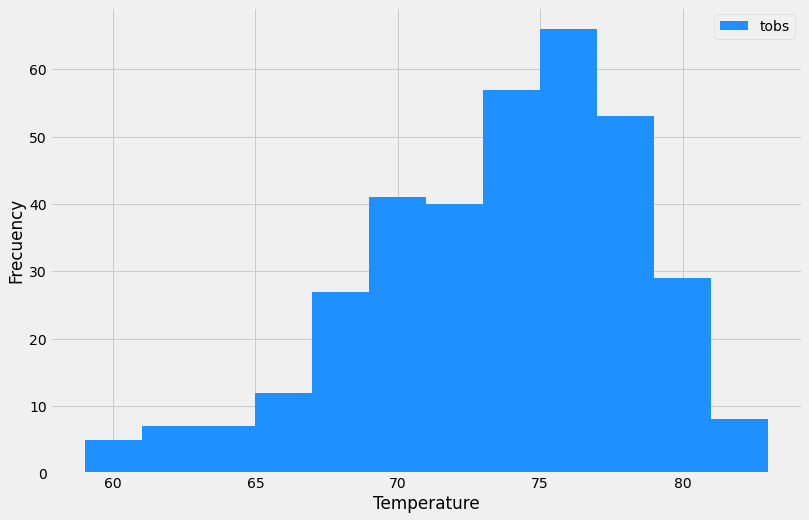

In [34]:
plt.figure(figsize=(12,8))
plt.hist(hist_temperature_df["Temperature"],bins = 12, color = "dodgerblue", label = 'tobs')
plt.xlabel("Temperature")
plt.ylabel("Frecuency")
plt.legend(loc='best')
plt.savefig("Exploratory_Precipitation_Analysis/Tobs_Plot.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()